In [ ]:
!pip install  opencv-python==3.4.2.17
!pip install  opencv-contrib-python==3.4.2.17
import cv2 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
import pickle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder1=r'/content/drive/MyDrive/Colab Notebooks/positive'
folder2=r'/content/drive/MyDrive/Colab Notebooks/negative'

## Preprocessing and feature description

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernels for prewitt edge detection
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [ ]:
# pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

### SIFT Descriptors, ORB, BRIEF, HOG, BRISK, ACAZE, DAISY, LATCH

#### POSITIVE

In [ ]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
   
    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3,3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise sift descriptor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img_prewitt, None)
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Notebooks/positive.csv', mode='a', header=False,index=False)

Streaming output truncated to the last 5000 lines.
descriptor shape  432  :  (126, 128)
descriptor shape  433  :  (93, 128)
descriptor shape  434  :  (101, 128)
descriptor shape  435  :  (103, 128)
descriptor shape  436  :  (113, 128)
descriptor shape  437  :  (102, 128)
descriptor shape  438  :  (117, 128)
descriptor shape  439  :  (97, 128)
descriptor shape  440  :  (115, 128)
descriptor shape  441  :  (100, 128)
descriptor shape  442  :  (92, 128)
descriptor shape  443  :  (118, 128)
descriptor shape  444  :  (128, 128)
descriptor shape  445  :  (124, 128)
descriptor shape  446  :  (141, 128)
descriptor shape  447  :  (114, 128)
descriptor shape  448  :  (142, 128)
descriptor shape  449  :  (92, 128)
descriptor shape  450  :  (125, 128)
descriptor shape  451  :  (161, 128)
descriptor shape  452  :  (131, 128)
descriptor shape  453  :  (144, 128)
descriptor shape  454  :  (129, 128)
descriptor shape  455  :  (148, 128)
descriptor shape  456  :  (147, 128)
descriptor shape  457  :  (1

In [ ]:
data1 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/positive.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,33.0,17.0,7.0,21.0,6.0,4.0,5.0,9.0,139.0,93.0,...,0.0,0.0,2.0,42.0,26.0,6.0,11.0,0.0,0.0,0.0
1,8.0,0.0,0.0,0.0,3.0,49.0,28.0,6.0,135.0,0.0,...,4.0,12.0,5.0,4.0,6.0,11.0,26.0,13.0,7.0,23.0
2,91.0,17.0,0.0,5.0,7.0,4.0,11.0,4.0,159.0,90.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,...,3.0,23.0,12.0,1.0,0.0,5.0,152.0,35.0,3.0,4.0
4,0.0,0.0,0.0,9.0,103.0,52.0,7.0,0.0,141.0,27.0,...,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528637,81.0,17.0,1.0,0.0,0.0,0.0,0.0,2.0,180.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
528638,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,1.0,120.0,39.0,3.0,8.0,46.0,14.0,0.0,4.0
528639,18.0,7.0,0.0,23.0,156.0,16.0,1.0,4.0,156.0,25.0,...,0.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0
528640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,17.0,0.0,0.0,0.0,3.0,142.0,7.0,0.0,0.0


#### SIFT NEGATIVE

In [ ]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise sift descriptor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img_prewitt, None)
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Notebooks/negative.csv', mode='a', header=False,index=False)

Streaming output truncated to the last 5000 lines.
descriptor shape  897  :  (44, 128)
descriptor shape  898  :  (56, 128)
descriptor shape  899  :  (91, 128)
descriptor shape  900  :  (51, 128)
descriptor shape  901  :  (36, 128)
descriptor shape  902  :  (86, 128)
descriptor shape  903  :  (38, 128)
descriptor shape  904  :  (68, 128)
descriptor shape  905  :  (44, 128)
descriptor shape  906  :  (84, 128)
descriptor shape  907  :  (70, 128)
descriptor shape  908  :  (54, 128)
descriptor shape  909  :  (31, 128)
descriptor shape  910  :  (92, 128)
descriptor shape  911  :  (85, 128)
descriptor shape  912  :  (68, 128)
descriptor shape  913  :  (72, 128)
descriptor shape  914  :  (62, 128)
descriptor shape  915  :  (90, 128)
descriptor shape  916  :  (78, 128)
descriptor shape  917  :  (81, 128)
descriptor shape  918  :  (96, 128)
descriptor shape  919  :  (68, 128)
descriptor shape  920  :  (96, 128)
descriptor shape  921  :  (82, 128)
descriptor shape  922  :  (19, 128)
descriptor sh

In [ ]:
data2= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/negative.csv',header=None,dtype='float64')
data2=data2.astype(np.float64)
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,25.0,13.0,...,69.0,10.0,118.0,135.0,3.0,5.0,51.0,103.0,17.0,1.0
1,16.0,9.0,6.0,4.0,5.0,8.0,18.0,15.0,32.0,35.0,...,0.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
2,56.0,15.0,15.0,48.0,26.0,2.0,12.0,105.0,22.0,7.0,...,1.0,12.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,16.0,0.0,0.0,0.0,2.0,4.0,3.0,25.0,10.0,1.0,...,83.0,124.0,6.0,1.0,9.0,65.0,124.0,24.0,0.0,5.0
4,35.0,3.0,0.0,1.0,5.0,21.0,28.0,58.0,138.0,26.0,...,42.0,43.0,23.0,8.0,14.0,7.0,7.0,8.0,41.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734786,4.0,0.0,0.0,0.0,3.0,30.0,12.0,4.0,108.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,27.0,21.0,9.0,0.0
734787,43.0,47.0,9.0,0.0,0.0,0.0,0.0,1.0,123.0,47.0,...,0.0,0.0,0.0,7.0,8.0,5.0,16.0,0.0,0.0,0.0
734788,28.0,11.0,1.0,0.0,0.0,0.0,2.0,4.0,33.0,33.0,...,7.0,50.0,6.0,22.0,101.0,65.0,21.0,4.0,0.0,0.0
734789,0.0,0.0,0.0,0.0,0.0,53.0,22.0,0.0,5.0,18.0,...,4.0,6.0,104.0,118.0,3.0,0.0,13.0,84.0,23.0,7.0


In [ ]:
data=data1.append(data2)

In [ ]:
csv_data=data.to_csv('/content/drive/MyDrive/Colab Notebooks/Sift_Final.csv', mode='a', header=False,index=False)

In [ ]:
##Now the SIFT file is loaded. So, start executing from this point onwards to save any time. Although the ebow method will take lots and lots of time.

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Sift_Final.csv',header=None,dtype='float64')
data=data.astype(np.float64)
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,33.0,17.0,7.0,21.0,6.0,4.0,5.0,9.0,139.0,93.0,...,0.0,0.0,2.0,42.0,26.0,6.0,11.0,0.0,0.0,0.0
1,8.0,0.0,0.0,0.0,3.0,49.0,28.0,6.0,135.0,0.0,...,4.0,12.0,5.0,4.0,6.0,11.0,26.0,13.0,7.0,23.0
2,91.0,17.0,0.0,5.0,7.0,4.0,11.0,4.0,159.0,90.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,9.0,...,3.0,23.0,12.0,1.0,0.0,5.0,152.0,35.0,3.0,4.0
4,0.0,0.0,0.0,9.0,103.0,52.0,7.0,0.0,141.0,27.0,...,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263428,4.0,0.0,0.0,0.0,3.0,30.0,12.0,4.0,108.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,27.0,21.0,9.0,0.0
1263429,43.0,47.0,9.0,0.0,0.0,0.0,0.0,1.0,123.0,47.0,...,0.0,0.0,0.0,7.0,8.0,5.0,16.0,0.0,0.0,0.0
1263430,28.0,11.0,1.0,0.0,0.0,0.0,2.0,4.0,33.0,33.0,...,7.0,50.0,6.0,22.0,101.0,65.0,21.0,4.0,0.0,0.0
1263431,0.0,0.0,0.0,0.0,0.0,53.0,22.0,0.0,5.0,18.0,...,4.0,6.0,104.0,118.0,3.0,0.0,13.0,84.0,23.0,7.0


In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [ ]:
#wcss = []
#clus=[]
#j=0
#for i in range(3, 23, 2): 
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#    kmeans.fit(data) 
#    wcss.append(kmeans.inertia_)
#    clus.append(i)
#    print(i,": ",wcss[j])
#    j+=1

#### Elbow plot for sift

In [ ]:
#plt.plot(range(3, 23, 2), wcss)
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS') 
#plt.show()

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#


In [ ]:
kmeans = KMeans(n_clusters=15, random_state= 0)
kmeans.fit(data)

KMeans(n_clusters=15, random_state=0)

In [ ]:
#kmeans.inertia_

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [ ]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 81350,  84304,  69782,  70605, 133755,  91465,  81793,  55403,
       108911,  90072,  55524,  62809, 120384,  58285,  98991]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [ ]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
   
    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise hog descriptor
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)
    
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Notebooks/hog_positive.csv', mode='a', header=False,index=False)

Streaming output truncated to the last 5000 lines.
descriptor shape  432  :  (108, 1)
descriptor shape  433  :  (108, 1)
descriptor shape  434  :  (108, 1)
descriptor shape  435  :  (108, 1)
descriptor shape  436  :  (108, 1)
descriptor shape  437  :  (108, 1)
descriptor shape  438  :  (108, 1)
descriptor shape  439  :  (108, 1)
descriptor shape  440  :  (108, 1)
descriptor shape  441  :  (108, 1)
descriptor shape  442  :  (108, 1)
descriptor shape  443  :  (108, 1)
descriptor shape  444  :  (108, 1)
descriptor shape  445  :  (108, 1)
descriptor shape  446  :  (108, 1)
descriptor shape  447  :  (108, 1)
descriptor shape  448  :  (108, 1)
descriptor shape  449  :  (108, 1)
descriptor shape  450  :  (108, 1)
descriptor shape  451  :  (108, 1)
descriptor shape  452  :  (108, 1)
descriptor shape  453  :  (108, 1)
descriptor shape  454  :  (108, 1)
descriptor shape  455  :  (108, 1)
descriptor shape  456  :  (108, 1)
descriptor shape  457  :  (108, 1)
descriptor shape  458  :  (108, 1)
desc

In [ ]:
data1 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/hog_positive.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0
0,0.100777
1,0.094607
2,0.112639
3,0.228522
4,0.240089
...,...
586651,0.263856
586652,0.263856
586653,0.127209
586654,0.064940


### Negative descriptors

In [ ]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    #initialise sift descriptor
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)


    descriptor = hog.compute(img_prewitt)
    out=pd.DataFrame(descriptor)
    
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Notebooks/hog_negative.csv', mode='a', header=False,index=False)

Streaming output truncated to the last 5000 lines.
descriptor shape  897  :  (108, 1)
descriptor shape  898  :  (108, 1)
descriptor shape  899  :  (108, 1)
descriptor shape  900  :  (108, 1)
descriptor shape  901  :  (108, 1)
descriptor shape  902  :  (108, 1)
descriptor shape  903  :  (108, 1)
descriptor shape  904  :  (108, 1)
descriptor shape  905  :  (108, 1)
descriptor shape  906  :  (108, 1)
descriptor shape  907  :  (108, 1)
descriptor shape  908  :  (108, 1)
descriptor shape  909  :  (108, 1)
descriptor shape  910  :  (108, 1)
descriptor shape  911  :  (108, 1)
descriptor shape  912  :  (108, 1)
descriptor shape  913  :  (108, 1)
descriptor shape  914  :  (108, 1)
descriptor shape  915  :  (108, 1)
descriptor shape  916  :  (108, 1)
descriptor shape  917  :  (108, 1)
descriptor shape  918  :  (108, 1)
descriptor shape  919  :  (108, 1)
descriptor shape  920  :  (108, 1)
descriptor shape  921  :  (108, 1)
descriptor shape  922  :  (108, 1)
descriptor shape  923  :  (108, 1)
desc

In [ ]:
data2= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/hog_negative.csv',header=None,dtype='float64')
data2=data2.astype(np.float64)
data2

,0
0,0.069593
1,0.063878
2,0.080624
3,0.126680
4,0.248904
...,...
636871,0.218707
636872,0.218707
636873,0.218707
636874,0.122416


In [ ]:
data=data1.append(data2)

In [ ]:
csv_data=data.to_csv('/content/drive/MyDrive/Colab Notebooks/Hog_Final.csv', mode='a', header=False,index=False)

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Hog_Final.csv',header=None,dtype='float64')
data=data.astype(np.float64)
data

,0
0,0.100777
1,0.094607
2,0.112639
3,0.228522
4,0.240089
...,...
1223527,0.218707
1223528,0.218707
1223529,0.218707
1223530,0.122416


**bold text**# Elbow Method





In [ ]:
#wcss = []
#clus=[]
#j=0
#for i in range(3, 23, 2): 
#    kmeans_hog = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
#    kmeans_hog.fit(data) 
#    wcss.append(kmeans_hog.inertia_)
#    clus.append(i)
#    print(i,": ",wcss[j])
#    j+=1

#### HOG Elbow method

In [ ]:
#plt.plot(range(3, 23, 2), wcss)
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS') 
#plt.show()

In [ ]:
kmeans_hog = KMeans(n_clusters=15, random_state= 0)
kmeans_hog.fit(data)

KMeans(n_clusters=15, random_state=0)

In [ ]:
#kmeans_hog.inertia_

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_HOG_Model.sav'
pickle.dump(kmeans_hog, open(filename, 'wb'))

In [ ]:
hist=np.histogram(kmeans_hog.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 71357, 133345,  96721,  59546,  97578,  68387,  25517,  61092,
       113430,  97909,  82544, 119231,   6143,  63569, 127163]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])) 



In [ ]:
#folder1=r"D:/StrData/Str"
#folder2=r"D:\StrData\Nstr"
#from sklearn.preprocessing import Normalizer
filename1 = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_Model.sav'
filename2 = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_HOG_Model.sav'
kmeans_sift = pickle.load(open(filename1, 'rb'))
kmeans_hog = pickle.load(open(filename2, 'rb'))


## Predicting and normalizing predictions 

### Positive predictions

In [ ]:
#performing kmeans prediction of the entire positive dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data1=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128, 64)
    img=cv2.resize(a,resize)
           
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints, descriptors = sift.detectAndCompute(img_prewitt, None)
    
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(descriptors)
     
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a1=kmeans_sift.predict(array_double)
    
    hist=np.histogram(a1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to an multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out2=pd.DataFrame(descriptor)
    array_double2 = np.array(out2, dtype=np.double)
    a2=kmeans_hog.predict(array_double2)
    
    hist2=np.histogram(a2,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    hist_list2 = list(hist2)
    hist_list2[0] = hist_list2[0]/out2.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None) #concatenate both feature descriptor values
    data1.append(hist_new)
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Finalpositive.csv', mode='a',header=False,index=False)

### Neagtive Predictions

In [ ]:
#performing kmeans prediction of the entire Negative dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data1=[]
#k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(128, 64)
    img=cv2.resize(a,resize)

    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(3, 3),0)#gaussian Image

    img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal 
    img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
    img_prewitt = img_prewittx + img_prewitty
    
    sift = cv2.xfeatures2d.SIFT_create()    
    keypoints, descriptors = sift.detectAndCompute(img_prewitt, None)
    
    #norm = Normalizer()
    #normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(descriptors)
     
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a1=kmeans_sift.predict(array_double)
    
    hist=np.histogram(a1,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    hist_list = list(hist)
    hist_list[0] = hist_list[0]/out.shape[0]
    
    cell_size = (32, 32)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins

    # winSize is the size of the image cropped to a multiple of the cell size
    # cell_size is the size of the cells of the img patch over which to calculate the histograms
    # block_size is the number of cells which fit in the patch
    hog = cv2.HOGDescriptor(_winSize=(img_prewitt.shape[1] // cell_size[1] * cell_size[1],
                                      img_prewitt.shape[0] // cell_size[0] * cell_size[0]),
                _blockSize=(block_size[1] * cell_size[1],
                            block_size[0] * cell_size[0]),
                _blockStride=(cell_size[1], cell_size[0]),
                _cellSize=(cell_size[1], cell_size[0]),
                _nbins=nbins)
    
    descriptor = hog.compute(img_prewitt)
    out2=pd.DataFrame(descriptor)
    array_double2 = np.array(out2, dtype=np.double)
    a2=kmeans_hog.predict(array_double2)
    
    hist2=np.histogram(a2,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    hist_list2 = list(hist2)
    hist_list2[0] = hist_list2[0]/out2.shape[0]
    #append the dataframe into the array in append mode, the array will only have 19 values which will store the values in a row
    hist_new = np.concatenate((hist_list[0],hist_list2[0]), axis = None) #default value for axis is column
    data1.append(hist_new)
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data1)
print(data1)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Finalnegative.csv', mode='a',header=False,index=False)

NameError: ignored

## Displaying the kmeans predicted data

In [ ]:
print("Positive(Children)")
dat1= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Finalpositive.csv',header=None)
print(dat1)

Positive(Children)
            0         1         2         3         4         5         6   \
0     0.068182  0.039773  0.034091  0.073864  0.073864  0.017045  0.062500   
1     0.055556  0.066667  0.027778  0.061111  0.100000  0.055556  0.061111   
2     0.074324  0.060811  0.054054  0.081081  0.081081  0.040541  0.060811   
3     0.057325  0.063694  0.070064  0.050955  0.070064  0.050955  0.089172   
4     0.089172  0.031847  0.038217  0.063694  0.095541  0.038217  0.089172   
...        ...       ...       ...       ...       ...       ...       ...   
5427  0.059524  0.095238  0.071429  0.071429  0.202381  0.071429  0.047619   
5428  0.028037  0.112150  0.056075  0.037383  0.084112  0.121495  0.037383   
5429  0.026786  0.098214  0.053571  0.071429  0.178571  0.098214  0.035714   
5430  0.052632  0.084211  0.010526  0.042105  0.178947  0.094737  0.031579   
5431  0.045045  0.117117  0.027027  0.054054  0.162162  0.081081  0.036036   

            7         8         9   ...     

In [ ]:
print("Negative(Empty terrace)")
dat2= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Finalnegative.csv',header=None)
print(dat2)

Negative(Empty terrace)
            0         1         2         3         4         5         6   \
0     0.060811  0.067568  0.040541  0.074324  0.148649  0.087838  0.060811   
1     0.049689  0.043478  0.018634  0.074534  0.111801  0.074534  0.049689   
2     0.052632  0.072368  0.046053  0.046053  0.105263  0.092105  0.072368   
3     0.072626  0.072626  0.061453  0.067039  0.078212  0.067039  0.044693   
4     0.065476  0.071429  0.041667  0.041667  0.089286  0.065476  0.089286   
...        ...       ...       ...       ...       ...       ...       ...   
5892  0.034965  0.069930  0.027972  0.041958  0.139860  0.062937  0.069930   
5893  0.042683  0.054878  0.018293  0.048780  0.121951  0.097561  0.091463   
5894  0.033113  0.046358  0.013245  0.039735  0.145695  0.086093  0.052980   
5895  0.054645  0.065574  0.049180  0.038251  0.065574  0.065574  0.081967   
5896  0.051429  0.051429  0.057143  0.028571  0.068571  0.034286  0.057143   

            7         8         9   ...

In [ ]:
#appending All classes into 1 csv file

A=dat1.append(dat2)

csv_data=A.to_csv('/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Final.csv', mode='a',header=False,index=False)

In [ ]:
A= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HOGSIFT_Final.csv',header=None)
A

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.068182,0.039773,0.034091,0.073864,0.073864,0.017045,0.062500,0.045455,0.068182,0.079545,...,0.0,0.027778,0.138889,0.055556,0.101852,0.046296,0.0,0.046296,0.083333,0
1,0.055556,0.066667,0.027778,0.061111,0.100000,0.055556,0.061111,0.055556,0.077778,0.077778,...,0.0,0.055556,0.157407,0.055556,0.101852,0.037037,0.0,0.064815,0.074074,0
2,0.074324,0.060811,0.054054,0.081081,0.081081,0.040541,0.060811,0.074324,0.027027,0.074324,...,0.0,0.148148,0.074074,0.009259,0.101852,0.055556,0.0,0.064815,0.083333,0
3,0.057325,0.063694,0.070064,0.050955,0.070064,0.050955,0.089172,0.050955,0.108280,0.076433,...,0.0,0.064815,0.175926,0.009259,0.111111,0.055556,0.0,0.046296,0.055556,0
4,0.089172,0.031847,0.038217,0.063694,0.095541,0.038217,0.089172,0.038217,0.095541,0.070064,...,0.0,0.064815,0.157407,0.064815,0.083333,0.046296,0.0,0.027778,0.092593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.034965,0.069930,0.027972,0.041958,0.139860,0.062937,0.069930,0.034965,0.174825,0.027972,...,0.0,0.074074,0.055556,0.074074,0.101852,0.166667,0.0,0.027778,0.111111,1
11325,0.042683,0.054878,0.018293,0.048780,0.121951,0.097561,0.091463,0.030488,0.103659,0.024390,...,0.0,0.083333,0.101852,0.009259,0.055556,0.074074,0.0,0.027778,0.046296,1
11326,0.033113,0.046358,0.013245,0.039735,0.145695,0.086093,0.052980,0.046358,0.112583,0.033113,...,0.0,0.157407,0.055556,0.009259,0.064815,0.157407,0.0,0.055556,0.083333,1
11327,0.054645,0.065574,0.049180,0.038251,0.065574,0.065574,0.081967,0.021858,0.120219,0.060109,...,0.0,0.175926,0.092593,0.064815,0.101852,0.120370,0.0,0.018519,0.046296,1


## Dimensionality reduction using PCA

In [ ]:
x = A.iloc[:,0:30].values

In [ ]:
x

array([[0.06818182, 0.03977273, 0.03409091, ..., 0.        , 0.0462963 ,
        0.08333333],
       [0.05555556, 0.06666667, 0.02777778, ..., 0.        , 0.06481481,
        0.07407407],
       [0.07432432, 0.06081081, 0.05405405, ..., 0.        , 0.06481481,
        0.08333333],
       ...,
       [0.03311258, 0.04635762, 0.01324503, ..., 0.        , 0.05555556,
        0.08333333],
       [0.05464481, 0.06557377, 0.04918033, ..., 0.        , 0.01851852,
        0.0462963 ],
       [0.05142857, 0.05142857, 0.05714286, ..., 0.        , 0.01851852,
        0.0462963 ]])

In [ ]:
y = A.iloc[:,30].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

#from sklearn.preprocessing import StandardScaler
#DhoniS = StandardScaler()
#Dhoni = DhoniS.fit_transform(x)

#Dhoni

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)
#pca.fit(Dhoni)
pca.fit(x)

PCA()

In [ ]:
#Bhumi = pca.transform(Dhoni)
Bhumi = pca.transform(x)

In [ ]:
Bhumi

array([[-1.45546621e-01, -5.78690319e-02,  1.63478261e-02, ...,
         1.32633303e-03,  1.06077787e-16,  1.10925795e-18],
       [-1.15639488e-01, -5.65520354e-02,  4.14472346e-02, ...,
         2.06646454e-03,  9.12585404e-17, -1.44446635e-18],
       [-1.14856642e-01, -5.38843540e-02, -3.72160166e-02, ...,
        -1.50719004e-03,  2.13260183e-18,  1.49870458e-17],
       ...,
       [ 5.13457343e-02, -5.46255503e-02, -2.95957978e-02, ...,
         5.11050106e-03,  3.88451045e-17,  9.99884961e-17],
       [-3.82423758e-02, -3.03080892e-02, -1.09523737e-02, ...,
         4.43151100e-03,  8.83090168e-17,  2.96654051e-18],
       [-3.61527865e-02, -3.60646243e-02, -2.11095103e-02, ...,
         3.97575226e-04,  3.56765159e-17,  2.72526692e-17]])

In [ ]:
Bhumi = pd.DataFrame(Bhumi)

In [ ]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.145547,-0.057869,0.016348,-0.024295,0.116402,-0.028196,0.024867,-0.013303,-0.016035,0.036206,...,0.007133,-0.007419,0.017970,-0.007061,-0.006962,0.008638,-0.010675,0.001326,1.060778e-16,1.109258e-18
1,-0.115639,-0.056552,0.041447,0.000271,0.060353,-0.035269,0.009068,-0.009756,-0.027834,0.000849,...,-0.005094,0.020154,-0.012466,-0.008250,-0.026498,0.009055,-0.010346,0.002066,9.125854e-17,-1.444466e-18
2,-0.114857,-0.053884,-0.037216,-0.038191,-0.002354,-0.050284,-0.027002,0.045697,-0.067747,-0.027469,...,0.008318,-0.000395,0.017426,-0.010496,-0.016801,-0.004286,-0.022676,-0.001507,2.132602e-18,1.498705e-17
3,-0.098354,-0.092104,0.009216,-0.021570,0.021361,-0.042655,0.058744,0.001973,-0.069565,0.032064,...,-0.006799,0.005865,-0.014270,-0.027486,-0.016843,0.014328,0.010695,0.002780,8.586131e-17,-3.698046e-17
4,-0.115755,-0.050824,0.051047,-0.002826,0.077547,-0.047789,0.022950,-0.002401,-0.031170,0.033295,...,0.021771,-0.009327,0.022148,-0.028901,-0.032458,0.021247,0.004857,0.004039,1.115609e-16,1.934638e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.070051,-0.001003,0.044423,-0.052612,0.030983,0.027020,0.023744,0.003720,-0.072507,-0.002377,...,-0.000374,-0.042269,-0.005646,-0.019359,-0.015728,0.001887,-0.002825,-0.000925,7.954162e-17,-3.170785e-17
11325,-0.004429,-0.118285,-0.001649,-0.031041,0.090958,0.013757,0.023236,-0.050646,-0.019287,-0.036848,...,0.025687,-0.026069,-0.012677,-0.027542,-0.014326,-0.014990,-0.008672,-0.003187,6.635677e-17,-2.131959e-17
11326,0.051346,-0.054626,-0.029596,-0.052890,0.040402,-0.017995,0.001041,0.034696,-0.110814,-0.065152,...,0.016290,-0.004141,-0.004257,-0.007783,0.014785,0.003657,0.027914,0.005111,3.884510e-17,9.998850e-17
11327,-0.038242,-0.030308,-0.010952,0.018182,0.062707,0.014500,0.034568,0.075119,-0.092458,-0.032877,...,0.002237,-0.048081,0.022284,-0.047038,-0.011092,-0.005374,-0.000176,0.004432,8.830902e-17,2.966541e-18


In [ ]:
Bhumi.shape

(11329, 30)

### Calculating number of components required

In [ ]:
print(pca.explained_variance_ratio_) 

[2.93419202e-01 1.11258066e-01 8.57726858e-02 6.70609811e-02
 5.97679806e-02 4.17996626e-02 3.33762885e-02 3.02489843e-02
 2.89946407e-02 2.44819683e-02 2.18676111e-02 1.93556069e-02
 1.78125074e-02 1.68529760e-02 1.60647025e-02 1.52904950e-02
 1.39825548e-02 1.32955366e-02 1.29261443e-02 1.22302004e-02
 1.17006554e-02 1.11577263e-02 1.07889570e-02 9.44033310e-03
 8.98222402e-03 6.41582072e-03 5.42243866e-03 2.33049357e-04
 7.06450286e-32 2.29932183e-32]


In [ ]:
l = pca.explained_variance_ratio_
l = l[:27]
l.sum()                   # 99 % variance explained by 20 components

0.9997669506427027

In [ ]:
pca = PCA(n_components=27)
pca.fit(x)

PCA(n_components=27)

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab Notebooks/PCA_27.sav'
pickle.dump(pca, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCA_27.sav'
pca = pickle.load(open(filename, 'rb'))

### Reducing the dimensions from 30 to 27

*   List item
*   List item



In [ ]:
Bhumi = pca.transform(x)

In [ ]:
Bhumi

array([[-1.45546621e-01, -5.78690319e-02,  1.63478261e-02, ...,
        -6.96246031e-03,  8.63789095e-03, -1.06746440e-02],
       [-1.15639488e-01, -5.65520354e-02,  4.14472346e-02, ...,
        -2.64978061e-02,  9.05541042e-03, -1.03457041e-02],
       [-1.14856642e-01, -5.38843540e-02, -3.72160166e-02, ...,
        -1.68010982e-02, -4.28614590e-03, -2.26756793e-02],
       ...,
       [ 5.13457343e-02, -5.46255503e-02, -2.95957978e-02, ...,
         1.47850031e-02,  3.65661488e-03,  2.79139366e-02],
       [-3.82423758e-02, -3.03080892e-02, -1.09523737e-02, ...,
        -1.10919375e-02, -5.37444857e-03, -1.76399424e-04],
       [-3.61527865e-02, -3.60646243e-02, -2.11095103e-02, ...,
        -3.71845345e-02, -8.95617199e-05,  3.92362930e-03]])

In [ ]:
Bhumi.shape

(11329, 27)

In [ ]:
print(pca.explained_variance_ratio_) 

[0.2934192  0.11125807 0.08577269 0.06706098 0.05976798 0.04179966
 0.03337629 0.03024898 0.02899464 0.02448197 0.02186761 0.01935561
 0.01781251 0.01685298 0.0160647  0.0152905  0.01398255 0.01329554
 0.01292614 0.0122302  0.01170066 0.01115773 0.01078896 0.00944033
 0.00898222 0.00641582 0.00542244]


In [ ]:
Bhumi = pd.DataFrame(Bhumi)

In [ ]:
print(pca.explained_variance_ratio_.sum()) 

0.9997669506427027


In [ ]:
Bhumi

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.145547,-0.057869,0.016348,-0.024295,0.116402,-0.028196,0.024867,-0.013303,-0.016035,0.036206,...,-0.038420,0.025715,-0.010219,0.007133,-0.007419,0.017970,-0.007061,-0.006962,0.008638,-0.010675
1,-0.115639,-0.056552,0.041447,0.000271,0.060353,-0.035269,0.009068,-0.009756,-0.027834,0.000849,...,-0.052271,0.007413,-0.043074,-0.005094,0.020154,-0.012466,-0.008250,-0.026498,0.009055,-0.010346
2,-0.114857,-0.053884,-0.037216,-0.038191,-0.002354,-0.050284,-0.027002,0.045697,-0.067747,-0.027469,...,-0.019882,0.028841,-0.040946,0.008318,-0.000395,0.017426,-0.010496,-0.016801,-0.004286,-0.022676
3,-0.098354,-0.092104,0.009216,-0.021570,0.021361,-0.042655,0.058744,0.001973,-0.069565,0.032064,...,-0.025518,-0.011212,-0.026946,-0.006799,0.005865,-0.014270,-0.027486,-0.016843,0.014328,0.010695
4,-0.115755,-0.050824,0.051047,-0.002826,0.077547,-0.047789,0.022950,-0.002401,-0.031170,0.033295,...,-0.024358,0.011240,-0.006784,0.021771,-0.009327,0.022148,-0.028901,-0.032458,0.021247,0.004857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.070051,-0.001003,0.044423,-0.052612,0.030983,0.027020,0.023744,0.003720,-0.072507,-0.002377,...,-0.013961,-0.016641,-0.019355,-0.000374,-0.042269,-0.005646,-0.019359,-0.015728,0.001887,-0.002825
11325,-0.004429,-0.118285,-0.001649,-0.031041,0.090958,0.013757,0.023236,-0.050646,-0.019287,-0.036848,...,0.014247,0.002376,-0.003488,0.025687,-0.026069,-0.012677,-0.027542,-0.014326,-0.014990,-0.008672
11326,0.051346,-0.054626,-0.029596,-0.052890,0.040402,-0.017995,0.001041,0.034696,-0.110814,-0.065152,...,0.024113,0.015301,-0.003338,0.016290,-0.004141,-0.004257,-0.007783,0.014785,0.003657,0.027914
11327,-0.038242,-0.030308,-0.010952,0.018182,0.062707,0.014500,0.034568,0.075119,-0.092458,-0.032877,...,0.002349,0.003363,-0.004987,0.002237,-0.048081,0.022284,-0.047038,-0.011092,-0.005374,-0.000176


In [ ]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1) # adding the label column

In [ ]:
B

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,-0.145547,-0.057869,0.016348,-0.024295,0.116402,-0.028196,0.024867,-0.013303,-0.016035,0.036206,...,0.057120,-0.018544,-0.022490,0.000891,0.026838,0.007164,-0.038420,0.025715,-0.010219,0
1,-0.115639,-0.056552,0.041447,0.000271,0.060353,-0.035269,0.009068,-0.009756,-0.027834,0.000849,...,0.037005,-0.022255,-0.000844,0.030326,-0.013975,0.008290,-0.052271,0.007413,-0.043074,0
2,-0.114857,-0.053884,-0.037216,-0.038191,-0.002354,-0.050284,-0.027002,0.045697,-0.067747,-0.027469,...,0.019529,0.022923,0.014920,-0.022434,-0.004950,-0.026177,-0.019882,0.028841,-0.040946,0
3,-0.098354,-0.092104,0.009216,-0.021570,0.021361,-0.042655,0.058744,0.001973,-0.069565,0.032064,...,0.038742,-0.045106,-0.007850,0.019009,-0.042331,-0.009381,-0.025518,-0.011212,-0.026946,0
4,-0.115755,-0.050824,0.051047,-0.002826,0.077547,-0.047789,0.022950,-0.002401,-0.031170,0.033295,...,0.015629,-0.039884,0.014495,0.018130,-0.016816,-0.051549,-0.024358,0.011240,-0.006784,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.070051,-0.001003,0.044423,-0.052612,0.030983,0.027020,0.023744,0.003720,-0.072507,-0.002377,...,-0.056357,0.017561,-0.006523,-0.008403,0.001825,0.013381,-0.013961,-0.016641,-0.019355,1
11325,-0.004429,-0.118285,-0.001649,-0.031041,0.090958,0.013757,0.023236,-0.050646,-0.019287,-0.036848,...,0.024368,-0.006644,0.016919,0.045963,-0.015271,-0.007719,0.014247,0.002376,-0.003488,1
11326,0.051346,-0.054626,-0.029596,-0.052890,0.040402,-0.017995,0.001041,0.034696,-0.110814,-0.065152,...,-0.021154,0.063965,-0.020838,0.036268,0.011840,0.014776,0.024113,0.015301,-0.003338,1
11327,-0.038242,-0.030308,-0.010952,0.018182,0.062707,0.014500,0.034568,0.075119,-0.092458,-0.032877,...,0.014677,0.027281,-0.021208,0.053033,-0.025162,0.027338,0.002349,0.003363,-0.004987,1


In [ ]:
csv_data=B.to_csv('/content/drive/MyDrive/Colab Notebooks/HS_FinalPCA_27.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [ ]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HS_FinalPCA_27.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.145547,-0.057869,0.016348,-0.024295,0.116402,-0.028196,0.024867,-0.013303,-0.016035,0.036206,...,0.025715,-0.010219,0.007133,-0.007419,0.017970,-0.007061,-0.006962,0.008638,-0.010675,0
1,-0.115639,-0.056552,0.041447,0.000271,0.060353,-0.035269,0.009068,-0.009756,-0.027834,0.000849,...,0.007413,-0.043074,-0.005094,0.020154,-0.012466,-0.008250,-0.026498,0.009055,-0.010346,0
2,-0.114857,-0.053884,-0.037216,-0.038191,-0.002354,-0.050284,-0.027002,0.045697,-0.067747,-0.027469,...,0.028841,-0.040946,0.008318,-0.000395,0.017426,-0.010496,-0.016801,-0.004286,-0.022676,0
3,-0.098354,-0.092104,0.009216,-0.021570,0.021361,-0.042655,0.058744,0.001973,-0.069565,0.032064,...,-0.011212,-0.026946,-0.006799,0.005865,-0.014270,-0.027486,-0.016843,0.014328,0.010695,0
4,-0.115755,-0.050824,0.051047,-0.002826,0.077547,-0.047789,0.022950,-0.002401,-0.031170,0.033295,...,0.011240,-0.006784,0.021771,-0.009327,0.022148,-0.028901,-0.032458,0.021247,0.004857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11324,0.070051,-0.001003,0.044423,-0.052612,0.030983,0.027020,0.023744,0.003720,-0.072507,-0.002377,...,-0.016641,-0.019355,-0.000374,-0.042269,-0.005646,-0.019359,-0.015728,0.001887,-0.002825,1
11325,-0.004429,-0.118285,-0.001649,-0.031041,0.090958,0.013757,0.023236,-0.050646,-0.019287,-0.036848,...,0.002376,-0.003488,0.025687,-0.026069,-0.012677,-0.027542,-0.014326,-0.014990,-0.008672,1
11326,0.051346,-0.054626,-0.029596,-0.052890,0.040402,-0.017995,0.001041,0.034696,-0.110814,-0.065152,...,0.015301,-0.003338,0.016290,-0.004141,-0.004257,-0.007783,0.014785,0.003657,0.027914,1
11327,-0.038242,-0.030308,-0.010952,0.018182,0.062707,0.014500,0.034568,0.075119,-0.092458,-0.032877,...,0.003363,-0.004987,0.002237,-0.048081,0.022284,-0.047038,-0.011092,-0.005374,-0.000176,1


In [ ]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:27].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,27]
print("Y values")
print(y)

X values
[[-1.45546621e-01 -5.78690319e-02  1.63478261e-02 ... -6.96246031e-03
   8.63789095e-03 -1.06746440e-02]
 [-1.15639488e-01 -5.65520354e-02  4.14472346e-02 ... -2.64978061e-02
   9.05541042e-03 -1.03457041e-02]
 [-1.14856642e-01 -5.38843540e-02 -3.72160166e-02 ... -1.68010982e-02
  -4.28614590e-03 -2.26756793e-02]
 ...
 [ 5.13457343e-02 -5.46255503e-02 -2.95957978e-02 ...  1.47850031e-02
   3.65661488e-03  2.79139366e-02]
 [-3.82423758e-02 -3.03080892e-02 -1.09523737e-02 ... -1.10919375e-02
  -5.37444857e-03 -1.76399424e-04]
 [-3.61527865e-02 -3.60646243e-02 -2.11095103e-02 ... -3.71845345e-02
  -8.95617199e-05  3.92362930e-03]]
Y values
0        0
1        0
2        0
3        0
4        0
        ..
11324    1
11325    1
11326    1
11327    1
11328    1
Name: 27, Length: 11329, dtype: int64


In [ ]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix

### Classification using 7 classifiers.

Decision Tree Results
Train Accuracy: 0.8115414321968443
Test Accuracy: 0.6690203000882613
Precision Score:  0.7129367327667611
Recall Score:  0.6286427976686095
True Negative Rate:  0.7145539906103286
False Positive Rate:  0.28544600938967135
F2 Score:  0.643868326795156
F1 Score:  0.668141592920354
Confusion Matrix: 
[[761 304]
 [446 755]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc5205410>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


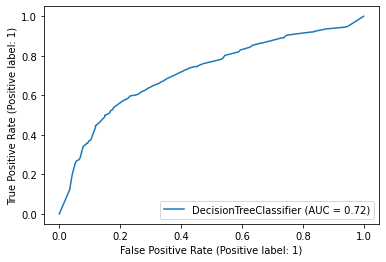

In [ ]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1)) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,x_test, y_test))
filename = 'DT_Model.pkl'
pickle.dump(model1, open(filename, 'wb'))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7466902030008826
Precision Score:  0.7742782152230971
Recall Score:  0.7368859283930058
True Negative Rate:  0.7577464788732394
False Positive Rate:  0.24225352112676057
F2 Score:  0.7440726416680679
F1 Score:  0.7551194539249148
Confusion Matrix: 
[[807 258]
 [316 885]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc51c2610>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


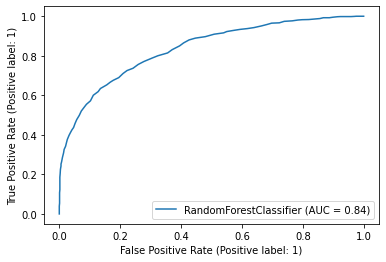

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
CM = confusion_matrix(y_test, y_pred2)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out or false positive rate

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2)) #True positive rate
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred2, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,x_test, y_test))
filename = 'RF_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))

KNN
Train Accuracy: 0.801941961822796
Test Accuracy: 0.7740511915269197
Precision Score:  0.7736298649722002
Recall Score:  0.8109908409658618
True Negative Rate:  0.7323943661971831
False Positive Rate:  0.2676056338028169
F2 Score:  0.8032327230743856
F1 Score:  0.7918699186991871
Confusion Matrix: 
[[780 285]
 [227 974]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc4a95a90>


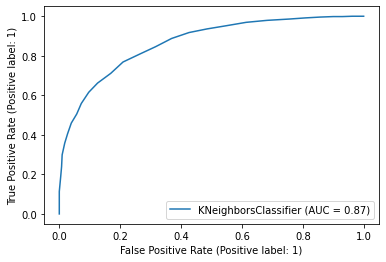

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 29)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
CM = confusion_matrix(y_test, y_pred3)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred3, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,x_test, y_test))
filename = 'KNN_Model.pkl'
pickle.dump(model3, open(filename, 'wb'))

Logistic Regression
Train Accuracy: 0.7092574202802604
Test Accuracy: 0.705648720211827
Precision Score:  0.7089201877934272
Recall Score:  0.7543713572023314
True Negative Rate:  0.6507042253521127
False Positive Rate:  0.3492957746478873
F2 Score:  0.7448207826372902
F1 Score:  0.7309398951189997
Confusion Matrix: 
[[693 372]
 [295 906]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc48feed0>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


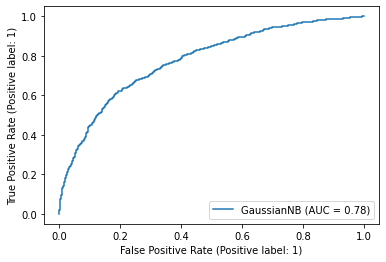

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("Logistic Regression")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred4, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,x_test, y_test))
filename = 'NB_Model.pkl'
pickle.dump(model4, open(filename, 'wb'))

SVM Linear kernel
Train Accuracy: 0.7279046673286991
Test Accuracy: 0.7127096204766108
Precision Score:  0.711864406779661
Recall Score:  0.7693588676103247
True Negative Rate:  0.6488262910798122
False Positive Rate:  0.3511737089201878
F2 Score:  0.7571288102261552
F1 Score:  0.7394957983193277
Confusion Matrix: 
[[691 374]
 [277 924]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc4857690>


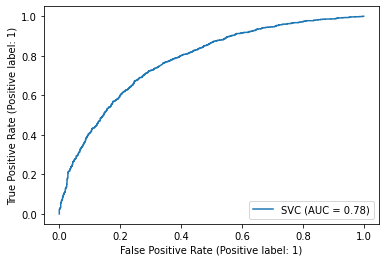

In [ ]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
CM = confusion_matrix(y_test, y_pred5)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred5, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
print("ROC curve ",metrics.plot_roc_curve(model5,x_test, y_test))
filename = 'SVML_Model.pkl'
pickle.dump(model5, open(filename, 'wb'))

SVM Polynomial
Train Accuracy: 0.8247820809886351
Test Accuracy: 0.763901147396293
Precision Score:  0.8043875685557587
Recall Score:  0.7327227310574521
True Negative Rate:  0.7990610328638498
False Positive Rate:  0.20093896713615023
F2 Score:  0.7460155985079688
F1 Score:  0.7668845315904139
Confusion Matrix: 
[[851 214]
 [321 880]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc4903250>


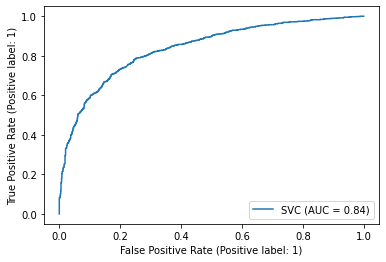

In [ ]:
model6 = svm.SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
CM = confusion_matrix(y_test, y_pred6)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred6,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
print("ROC curve ",metrics.plot_roc_curve(model6,x_test, y_test))
filename = 'SVMP_Model.pkl'
pickle.dump(model6, open(filename, 'wb'))

SVM sigmoid
Train Accuracy: 0.5782853359814631
Test Accuracy: 0.5366284201235657
Precision Score:  0.5660542432195975
Recall Score:  0.5387177352206495
True Negative Rate:  0.5342723004694836
False Positive Rate:  0.46572769953051646
F2 Score:  0.5439717504624181
F1 Score:  0.5520477815699659
Confusion Matrix: 
[[569 496]
 [554 647]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc4771790>


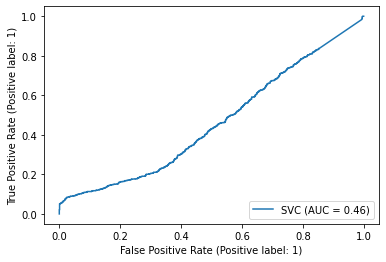

In [ ]:
model7 = svm.SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
CM = confusion_matrix(y_test, y_pred7)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred7, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
print("ROC curve ",metrics.plot_roc_curve(model7,x_test, y_test))
filename = 'SVMS_Model.pkl'
pickle.dump(model7, open(filename, 'wb'))

SVM rbf
Train Accuracy: 0.8482842325940638
Test Accuracy: 0.7864077669902912
Precision Score:  0.8087855297157622
Recall Score:  0.7818484596169858
True Negative Rate:  0.7915492957746478
False Positive Rate:  0.2084507042253521
F2 Score:  0.7870913663034368
F1 Score:  0.7950889077053345
Confusion Matrix: 
[[843 222]
 [262 939]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4cc471fed0>


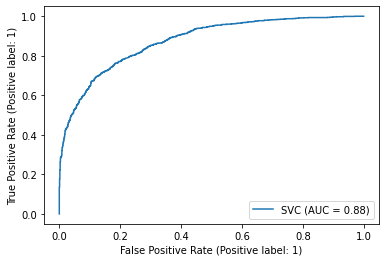

In [ ]:
model8 = svm.SVC(kernel='rbf', probability=True)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
CM = confusion_matrix(y_test, y_pred8)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM rbf")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred8,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))
print("ROC curve ",metrics.plot_roc_curve(model8,x_test, y_test))
filename = 'SVMR_Model.pkl'
pickle.dump(model8, open(filename, 'wb'))

In [ ]:
#filename1 = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_HOG_Model.sav'
#filename2 = '/content/drive/MyDrive/Colab Notebooks/Kmeans_CL_15_Model.sav'
#filename3 = '/content/drive/MyDrive/Colab Notebooks/PCA_27.sav'
#pca = pickle.load(open(filename3, 'rb'))
#kmeans_sift = pickle.load(open(filename2, 'rb'))
#kmeans_hog = pickle.load(open(filename1, 'rb'))